In [1]:
#import libraries
library(Seurat)
library(SeuratData)
library(ggplot2)
source('https://raw.githubusercontent.com/jumphone/BEER/master/BEER.R')

─ Installed datasets ─────────────────── SeuratData v0.2.1 ─

✔ stxBrain 0.1.1              


─────────────────── Key ───────────────────

✔ Dataset loaded successfully
❯ Dataset built with a newer version of Seurat than installed
❓ Unknown version of Seurat installed




[1] "Welcome to BEER (v0.1.7)!"


Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel



In [3]:
#####import dataframe
#public
public_project <- "GSE121654"
public_sample <- "GSM3442006"
public_data <- read.delim(
  "GSM3442006_E14_F_B10.dge.txt",
  stringsAsFactor=FALSE,
  row=1,
  header = TRUE) 
#private
private_project <- "GSE128855"
private_sample <- "GSM3687213"
private_data <- read.delim(
  "GSM3687213_countTable_K22_dura_wt.txt",
  stringsAsFactor=FALSE,
  row=1,
  header = TRUE)

In [4]:
#####Integration
colnames(public_data) = paste0("public_",colnames(public_data))
colnames(private_data) = paste0("private_",colnames(private_data))
integ_data = .simple_combine(public_data, private_data, FILL=TRUE)$combine
BATCH = rep("GSM3687213", ncol(integ_data))
BATCH[c(1:ncol(public_data))] = "GSM3442006"

In [5]:
integ_data

,public_CAGACATGCCCTTG.1,public_AGGTTGTGTCTGGA.1,public_CTGATGGACCGAAT.1,public_CCTCGAACGCAAGG.1,public_TCGGCACTCTGTGA.1,public_AGAGCTACTTGAGC.1,public_ATGCACGAGTCTGA.1,public_AAGTCTCTTCGACA.1,public_CCATATACGTTTGG.1,public_TCGTTATGCGATAC.1,⋯,private_TTTGTCAAGTGTACTC,private_TTTGTCAAGTTACCCA,private_TTTGTCACACCTATCC,private_TTTGTCACATCTCCCA,private_TTTGTCAGTAGCTTGT,private_TTTGTCAGTGACGGTA,private_TTTGTCAGTGCGAAAC,private_TTTGTCATCCTTCAAT,private_TTTGTCATCGCAAGCC,private_TTTGTCATCGTTTGCC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610009B22Rik,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
0610009L18Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610009O20Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,2,0,0,0
0610010F05Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610010K14Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,4,1,0,0
0610011F06Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,1,0,0,1
0610012D04Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610012G03Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,1,1,0,2,1,4,0,0,0


In [6]:
#Quality Control
PosN=apply(integ_data,2,.getPos)
USED=which(PosN>500 & PosN<4000)
qc_data = integ_data[,USED]; qc_batch=BATCH[USED]

In [7]:
qc_data

,public_CAGACATGCCCTTG.1,public_AGGTTGTGTCTGGA.1,public_CTGATGGACCGAAT.1,public_CCTCGAACGCAAGG.1,public_TCGGCACTCTGTGA.1,public_AGAGCTACTTGAGC.1,public_ATGCACGAGTCTGA.1,public_AAGTCTCTTCGACA.1,public_CCATATACGTTTGG.1,public_TCGTTATGCGATAC.1,⋯,private_TTTGTCAAGTGTACTC,private_TTTGTCAAGTTACCCA,private_TTTGTCACACCTATCC,private_TTTGTCACATCTCCCA,private_TTTGTCAGTAGCTTGT,private_TTTGTCAGTGACGGTA,private_TTTGTCAGTGCGAAAC,private_TTTGTCATCCTTCAAT,private_TTTGTCATCGCAAGCC,private_TTTGTCATCGTTTGCC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610009B22Rik,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
0610009L18Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610009O20Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,2,0,0,0
0610010F05Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610010K14Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,4,1,0,0
0610011F06Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,1,0,0,1
0610012D04Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610012G03Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,1,1,0,2,1,4,0,0,0


In [8]:
#####Detect and remove batch effect
mybeer = BEER(
  qc_data,
  qc_batch,
  GNUM=30,
  PCNUM=50,
  ROUND=2,
  GN=2000,
  SEED=1,
  COMBAT=TRUE,
  RMG=NULL)

[1] "BEER start!"
[1] "2020-03-15 17:42:43 JST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 30
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 2
[1] 1
[1] "GSM3442006"
[1] 2
[1] "GSM3687213"
[1] "Total varible gene number (GN) is:"
[1] 3504


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  Apoe 
Negative:  Stmn1 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:43:23 UMAP embedding parameters a = 0.9922 b = 1.112

17:43:24 Read 8348 rows and found 50 numeric columns

17:43:24 Using Annoy for neighbor search, n_neighbors = 30

17:43:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

17:43:26 Writing NN index file to temp file /var/folders/dz/p6h1hl554kz1w5mdkrn_h2tc0000gn/T//Rtmp2osqK3/file113f56172d5ec

17:43:26 Searching Annoy index using 1 thread, search_k = 3000

17:43:29 Annoy recall = 100%

17:

[1] "Get group for:"
[1] "GSM3442006"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "GSM3687213"
[1] "Group Number:"
[1] 30
[1] "Finding MN pairs..."
[1] "1 / 60"
[1] "ROUND:"
[1] 1
[1] "ROUND:"
[1] 2
[1] "Number of MN pairs:"
[1] 2
[1] "Evaluating PCs ..."
[1] "Start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "############################################################################"
[1] "2020-03-15 17:44:01 JST"


In [10]:
#####Detect and remove batch effect
mybeer2 = BEER(
  qc_data,
  qc_batch,
  GNUM=30,
  PCNUM=50,
  ROUND=1,
  GN=2000,
  SEED=1,
  COMBAT=TRUE,
  RMG=NULL)

[1] "BEER start!"
[1] "2020-03-15 17:45:45 JST"
[1] "Group number (GNUM) is:"
[1] 30
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "GSM3442006"
[1] 2
[1] "GSM3687213"
[1] "Total varible gene number (GN) is:"
[1] 3504


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  Apoe 
Negative:  Stmn1 

17:46:29 UMAP embedding parameters a = 0.9922 b = 1.112

17:46:29 Read 8348 rows and found 50 numeric columns

17:46:29 Using Annoy for neighbor search, n_neighbors = 30

17:46:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

17:46:32 Writing NN index file to temp file /var/folders/dz/p6h1hl554kz1w5mdkrn_h2tc0000gn/T//Rtmp2osqK3/file113f570f6e63

17:46:32 Searching Annoy index using 1 thread, search_k = 3000

17:46:35 Annoy recall = 100%

17:46:35 Commencing smooth kNN distance calibration using 1 thread

17:46:36 Initializing from normalized Laplacian + noise

17:46:37 Commencing optimization for 500 epochs, with 354476 positive edges

17:46:51 Optimization finished



[1] "Get group for:"
[1] "GSM3442006"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "GSM3687213"
[1] "Group Number:"
[1] 30
[1] "Finding MN pairs..."
[1] "1 / 60"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 1
[1] "Evaluating PCs ..."
[1] "Start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "############################################################################"
[1] "2020-03-15 17:47:07 JST"


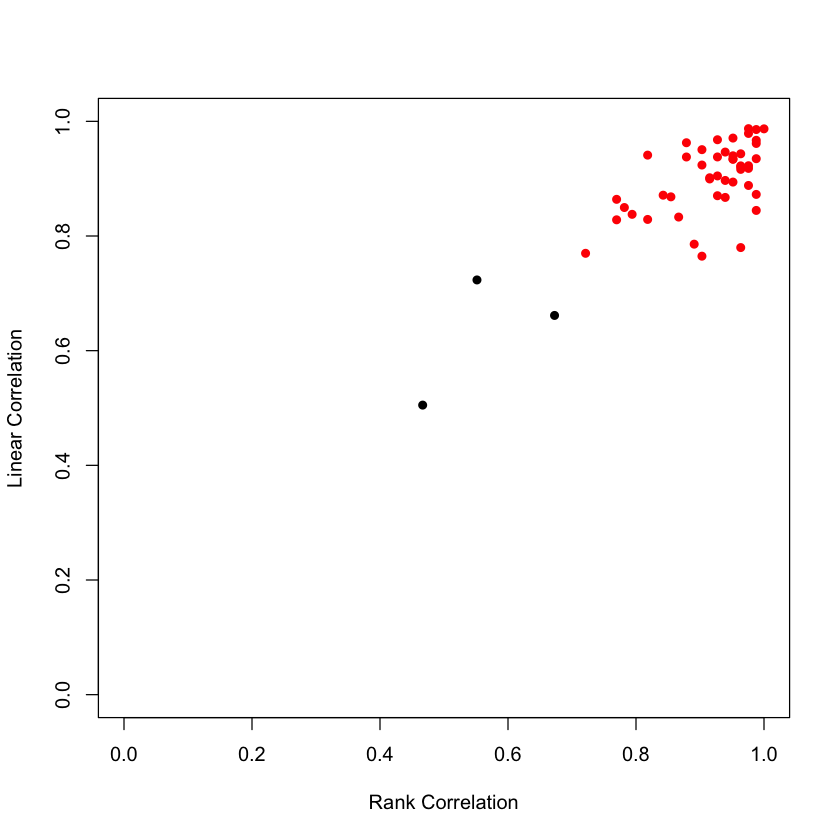

In [9]:
#check selected PCs
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(
  mybeer$cor,
  mybeer$lcor,
  pch=16,
  col=COL,
  xlab='Rank Correlation',
  ylab='Linear Correlation',
  xlim=c(0,1),
  ylim=c(0,1))

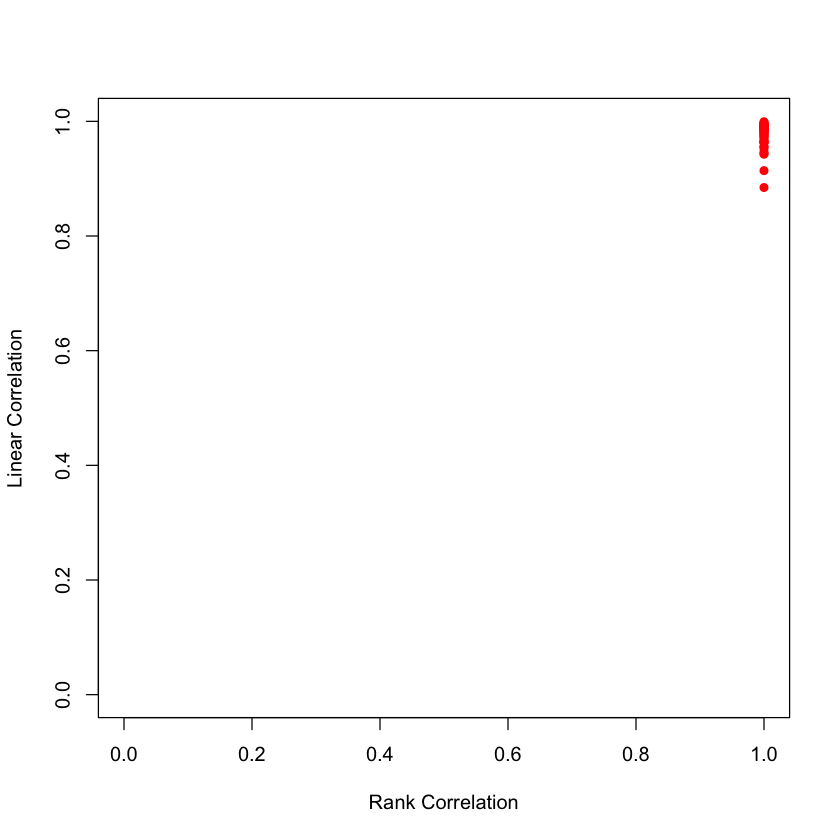

In [11]:
#check selected PCs
PCUSE=mybeer2$select
COL=rep('black',length(mybeer2$cor))
COL[PCUSE]='red'
plot(
  mybeer2$cor,
  mybeer2$lcor,
  pch=16,
  col=COL,
  xlab='Rank Correlation',
  ylab='Linear Correlation',
  xlim=c(0,1),
  ylim=c(0,1))

[1] "Spp1"           "Elane"          "Tpsb2"          "Cma1"          
   [5] "Prtn3"          "Retnla"         "Cpa3"           "Gzma"          
   [9] "Mcpt4"          "Mpo"            "Ccl5"           "Ccl17"         
  [13] "Hba-a1"         "Ctsg"           "Hbb-bt"         "Hbb-bs"        
  [17] "Hba-a2"         "Fcnb"           "Retnlg"         "Meg3"          
  [21] "Ccl8"           "Cxcl9"          "Vpreb1"         "Gypa"          
  [25] "Chil3"          "Ccr7"           "Ccl22"          "Ms4a3"         
  [29] "Ifitm1"         "Car2"           "Lcn2"           "Gzmb"          
  [33] "Camp"           "Ltf"            "Ngp"            "Igll1"         
  [37] "Cd209f"         "Gm5483"         "Xcl1"           "Alas2"         
  [41] "Cxcl10"         "Mcpt8"          "Prss34"         "Cd209g"        
  [45] "Acp5"           "Dntt"           "Tuba1a"         "Hemgn"         
  [49] "G0s2"           "Fscn1"          "Tubb3"          "Il12b"         
  [53] "Hist1h2ap"      "Jchain"         "Wfdc21"         "Nnat"          
  [57] "Car1"           "Klra4"          "Lyz1"           "Ccl12"         
  [61] "Cox6a2"         "Fabp5"          "Cd209a"         "Vpreb3"        
  [65] "Ccl24"          "Ly6d"           "Ccl7"           "Rhd"           
  [69] "Klra8"          "Neurod6"        "Cxcl2"          "Xist"          
  [73] "Ctsk"           "Nkg7"           "Slc4a1"         "Pglyrp1"       
  [77] "Klk1"           "Apol7c"         "Mmp8"           "Aqp1"          
  [81] "Stfa1"          "Stfa2l1"        "Mzb1"           "Ebf1"          
  [85] "2810417H13Rik"  "Serpina3g"      "Snca"           "Fcer1a"        
  [89] "Serpinb6b"      "Saa3"           "Myl4"           "Gata2"         
  [93] "Fabp7"          "Klra7"          "Ccl4"           "Il6"           
  [97] "Ctse"           "Serpinb1a"      "Ifitm6"         "Cd200r3"       
 [101] "S100a9"         "Mgp"            "Bcl2l14"        "Plpp3"         
 [105] "Ptgds"          "Mrgprb1"        "Tfap2b"         "Anxa1"         
 [109] "Ms4a1"          "Atp6v0d2"       "Stmn2"          "Cebpe"         
 [113] "Cd209b"         "1500015O10Rik"  "Gpnmb"          "Cd8b1"         
 [117] "Sox11"          "Ly6a"           "Ube2c"          "Gdf15"         
 [121] "Hmgn2"          "Ly6g"           "Map1b"          "Slpi"          
 [125] "Cyr61"          "Areg"           "Ccl2"           "H2-M2"         
 [129] "Mmp9"           "AW112010"       "Ly6i"           "Lyve1"         
 [133] "Igfbp7"         "Ms4a2"          "Neurog2"        "Ly6c2"         
 [137] "Igfbp5"         "Il1b"           "Cd7"            "Mt2"           
 [141] "Wfdc17"         "Cyp11a1"        "Cd79a"          "Rgcc"          
 [145] "Chchd10"        "AA467197"       "S100a8"         "Tppp3"         
 [149] "Zmynd15"        "Il4i1"          "Ctla2a"         "Ramp3"         
 [153] "Klra1"          "Vsig4"          "Ttr"            "Cd24a"         
 [157] "Klra9"          "Cd209d"         "Ccr9"           "Cd3g"          
 [161] "Gap43"          "Tuba4a"         "Tnip3"          "Nfib"          
 [165] "Gm13546"        "Sst"            "Ccl3"           "Gbp2"          
 [169] "Nudt17"         "Tubb2b"         "Ptn"            "Hp"            
 [173] "H2afx"          "Ms4a4b"         "Asprv1"         "Serpinh1"      
 [177] "S100a4"         "Rtn1"           "Igfbpl1"        "Xcr1"          
 [181] "Lrg1"           "Mmp13"          "Cldn13"         "Stfa3"         
 [185] "Serpinb9"       "Rrm2"           "Fn1"            "Plac8"         
 [189] "Bdh2"           "Tmem123"        "Snhg11"         "Klre1"         
 [193] "Tpsg1"          "Hmox1"          "Cxcr6"          "Tnfrsf9"       
 [197] "Folr2"          "Cxcl1"          "Ear2"           "Tpsab1"        
 [201] "Klf1"           "Il10"           "D13Ertd608e"    "Tnfrsf4"       
 [205] "Csrp3"          "Cd177"          "Myl10"          "Pf4"           
 [209] "Spta1"          "Hmgb2"          "Naaa"           "Apod"          
 [213] "Orm1"           "Bfs

Centering and scaling data matrix

PC_ 1 
Positive:  mt.Cytb 
Negative:  Actg1 

18:06:55 UMAP embedding parameters a = 0.9922 b = 1.112

18:06:55 Read 8348 rows and found 50 numeric columns

18:06:55 Using Annoy for neighbor search, n_neighbors = 30

18:06:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

18:06:58 Writing NN index file to temp file /var/folders/dz/p6h1hl554kz1w5mdkrn_h2tc0000gn/T//Rtmp2osqK3/file113f5563524f3

18:06:58 Searching Annoy index using 1 thread, search_k = 3000

18:07:01 Annoy recall = 100%

18:07:01 Commencing smooth kNN distance calibration using 1 thread

18:07:02 Initializing from normalized Laplacian + noise

18:07:02 Commencing optimization for 500 epochs, with 351664 positive edges

18:07:17 Optimization finished



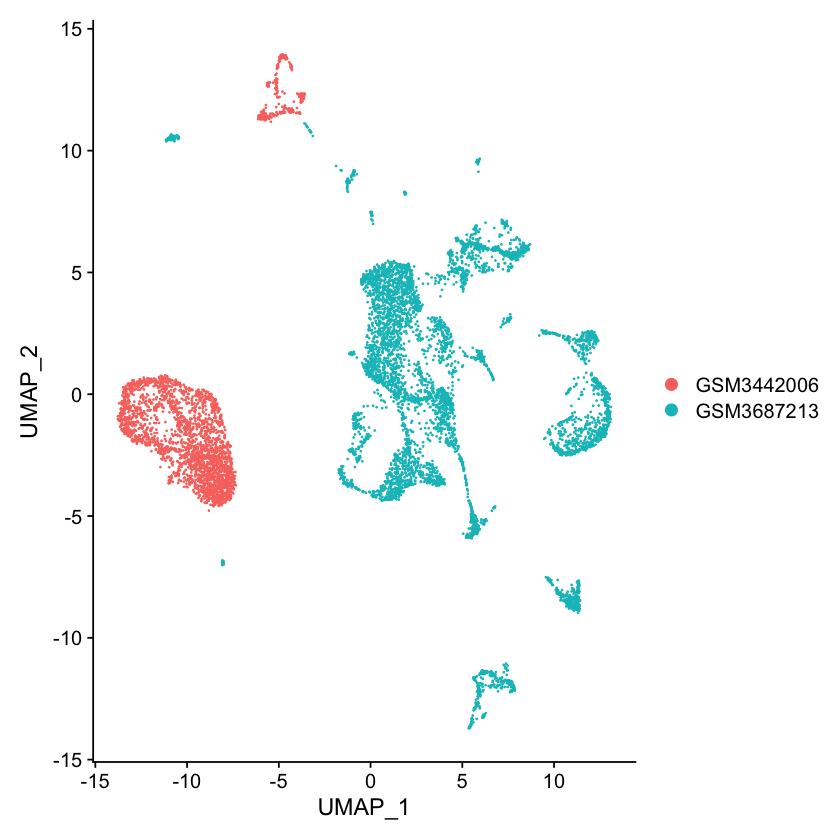

In [17]:
keep_batch = CreateSeuratObject(counts=qc_data, min.cells = 0, min.features = 0, project = "ALL")
keep_batch@meta.data$batch=qc_batch
keep_batch = FindVariableFeatures(object = keep_batch, selection.method = "vst", nfeatures = 2000)
VariableFeatures(object = keep_batch)
keep_batch <- NormalizeData(object = keep_batch, normalization.method = "LogNormalize", scale.factor = 10000)
keep_batch <- ScaleData(object = keep_batch, features = VariableFeatures(object = keep_batch))
keep_batch <- RunPCA(object = keep_batch, seed.use=123, npcs = 50, features = VariableFeatures(object = keep_batch), ndims.print = 1, nfeatures.print = 1)
keep_batch <- RunUMAP(keep_batch, dims = 1:50, seed.use = 123, n.components = 2)
DimPlot(keep_batch, reduction = 'umap', group.by = 'batch', pt.size=0.1)

Warning message:
“The following arguments are not used: check_duplicates”
18:08:45 UMAP embedding parameters a = 0.9922 b = 1.112

18:08:45 Read 8348 rows and found 47 numeric columns

18:08:45 Using Annoy for neighbor search, n_neighbors = 30

18:08:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

18:08:47 Writing NN index file to temp file /var/folders/dz/p6h1hl554kz1w5mdkrn_h2tc0000gn/T//Rtmp2osqK3/file113f57f5d31e5

18:08:47 Searching Annoy index using 1 thread, search_k = 3000

18:08:51 Annoy recall = 100%

18:08:51 Commencing smooth kNN distance calibration using 1 thread

18:08:52 Initializing from normalized Laplacian + noise

18:08:52 Commencing optimization for 500 epochs, with 353088 positive edges

18:09:07 Optimization finished



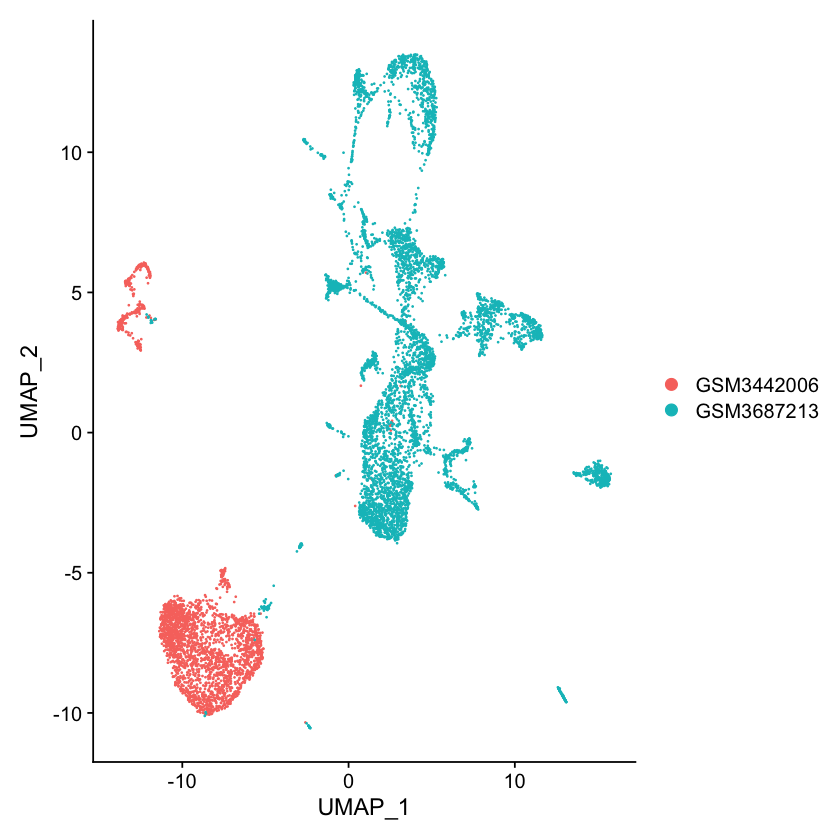

In [18]:
#####Visualization
data_seurat <- mybeer$seurat
PCUSE <- mybeer$select
data_seurat <- RunUMAP(
  object = data_seurat,
  reduction ='pca',
  dims = PCUSE,
  check_duplicates=FALSE)
DimPlot(
  data_seurat,
  reduction ='umap',
  group.by='batch',
  pt.size=0.1)